## Parallel Coordinate Plots



For higher dimensional data Parallel Coordinate Plots are a powerful tool to analyze how dense solutions are distributed in different ranges regarding each coordinate.

Let us create some data for the purpose of visualization:

In [1]:
from pymoo.factory import get_problem, get_reference_directions

ref_dirs = get_reference_directions("das-dennis", 6, n_partitions=5) * [2, 4, 8, 16, 32, 64]
F = get_problem("dtlz1").pareto_front(ref_dirs)

This is the Pareto-front for the DTLZ1 test problem with 6 objectives with some scale added. We add a different scaling to show the effect of normalization later on. Let us assume our algorithm converged after a number of generation and this is the result set.

In [2]:
from pymoo.visualization.pcp import PCP
PCP().add(F).show()

This gives an idea of the overall result set. 
Let us assume we identified solution 50 and 75 to more of interesest and like to highlight them in our plot:

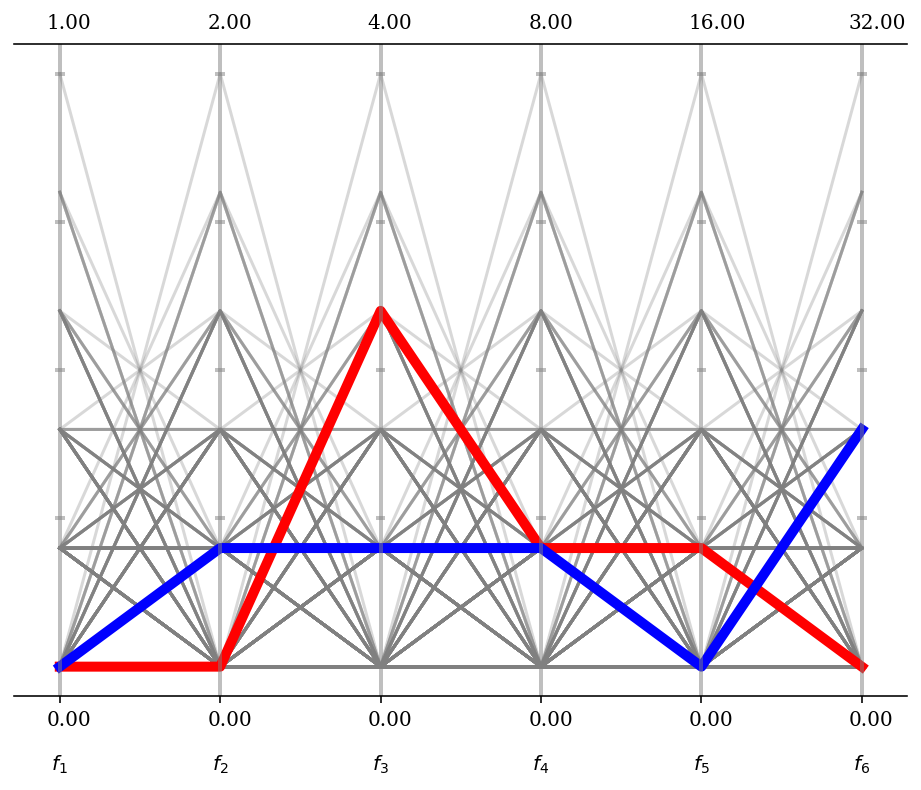

In [3]:
plot = PCP()
plot.set_axis_style(color="grey", alpha=0.5)
plot.add(F, color="grey", alpha=0.3)
plot.add(F[50], linewidth=5, color="red")
plot.add(F[75], linewidth=5, color="blue")
plot.show()

Please note, that the PCP object just is a wrapper around a matplotlib figure. All options that apply for plotting the corresponding type (here line, but can also be scatter, polygon, ...) can be used, such as linde width, color and alpha.

Some more options to be used in a plot

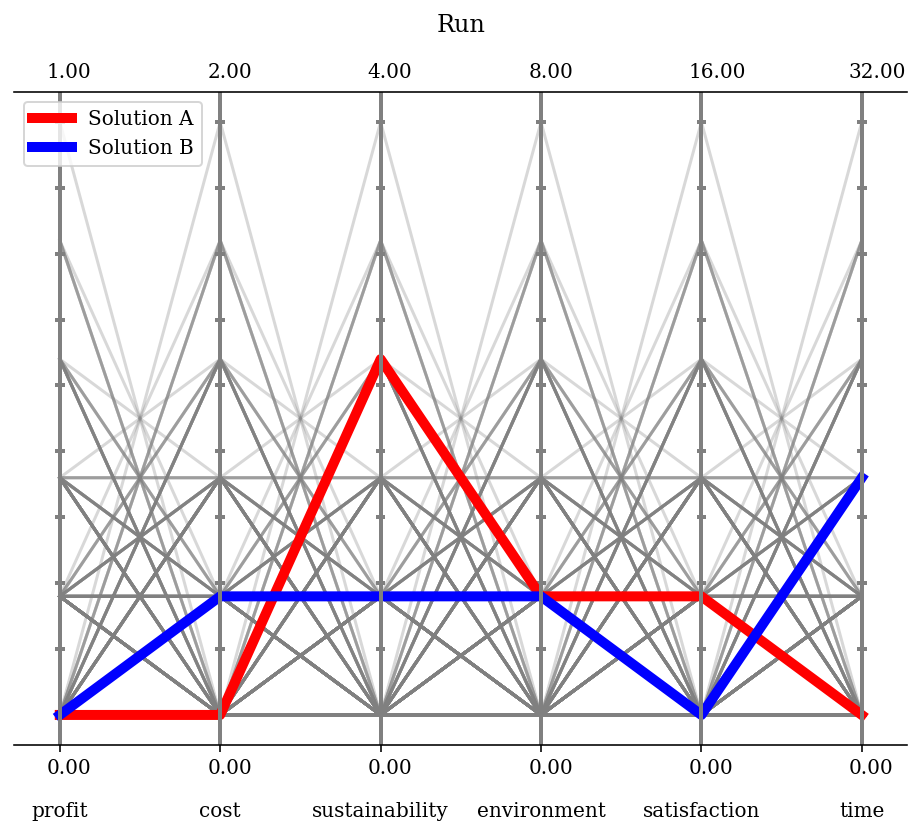

In [4]:
plot = PCP(title=("Run", {'pad': 30}),
           n_ticks=10,
           legend=(True, {'loc': "upper left"}),
           labels=["profit", "cost", "sustainability", "environment", "satisfaction", "time"]
           )

plot.set_axis_style(color="grey", alpha=1)
plot.add(F, color="grey", alpha=0.3)
plot.add(F[50], linewidth=5, color="red", label="Solution A")
plot.add(F[75], linewidth=5, color="blue", label="Solution B")
plot.show()

Moreover, if the boundaries should be set manually, this can be achieved by turning the default normalization of and providing them. Either directly as a numpy array or just an integer to be set for all axes.

<Figure size 576x432 with 0 Axes>

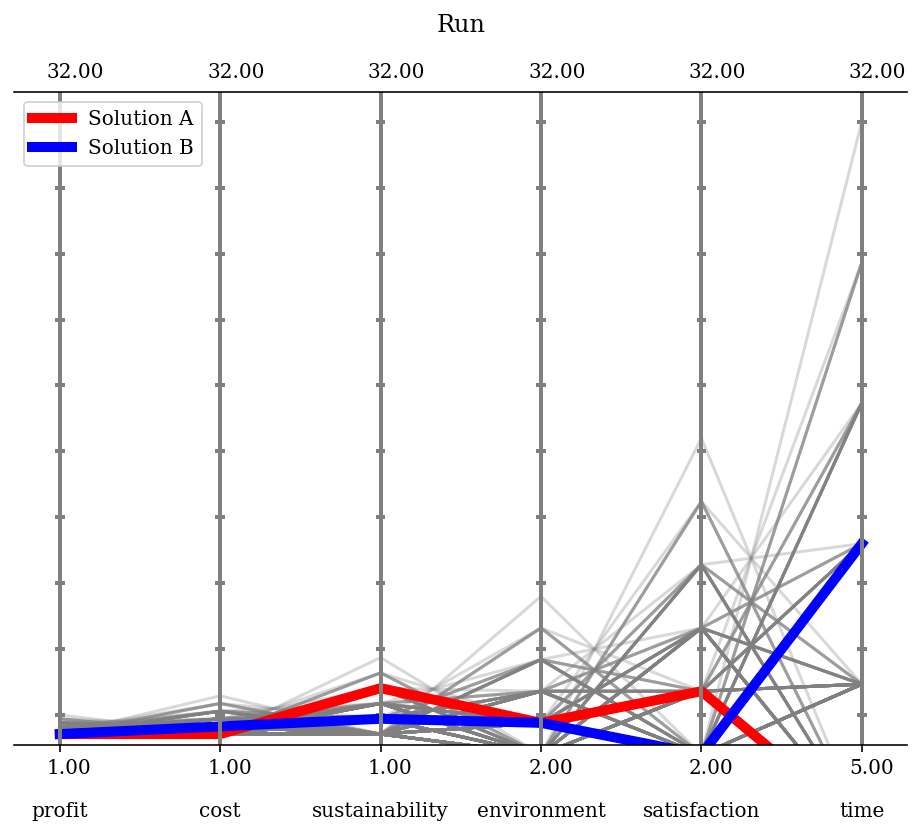

In [5]:
plot.reset()
plot.normalize_each_axis = False
plot.bounds=[[1,1,1,2,2,5],[32,32,32,32,32,32]]
plot.show()

### API